In [28]:
import pandas as pd
import epitopepredict as ep
from epitopepredict import base, sequtils
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

In [26]:
inpath = "data/Common_COV_SARS2_N_comparison.fasta"
outpath = "data/epitope-predictions/"
df = sequtils.fasta_to_dataframe(path)

display(df)

,locus_tag,translation,description,type
0,YP_173242.1,MSYTPGHYAGSRSSSGNRSGILKKTSWADQSERNYQTFNRGRKTQP...,YP_173242.1 nucleocapsid phosphoprotein [Human...,CDS
1,YP_009555245.1,MSFTPGKQSSSRASSGNRSGNGILKWADQSDQFRNVQTRGRRAQPK...,YP_009555245.1 nucleocapsid protein [Human cor...,CDS
2,YP_003771.1,MASVNWADDRAARKKFPPPSFYMPLLVSSDKAPYRVIPRNLVPIGK...,YP_003771.1 Nucleocapsid protein [Human corona...,CDS
3,NP_073556.1,MATVKWADASEPQRGRQGRIPYSLYSPLLVDSEQPWKVIPRNLVPI...,NP_073556.1 nucleocapsid protein [Human corona...,CDS
4,YP_009724397.2,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,YP_009724397.2 nucleocapsid phosphoprotein [Se...,CDS


In [22]:
print(base.predictors)

['basicmhc1', 'tepitope', 'netmhciipan', 'netmhcpan', 'mhcflurry', 'mhcnuggets', 'iedbmhc1', 'iedbmhc2']


In [23]:
# Make a choice about which alleles to include
alleles = base.get_preset_alleles('broad_coverage_mhc1')
#alleles = ['HLA-A01:01']

# Make a choice of which predictors to use
models = ['mhcnuggets', 'mhcflurry', 'netmhcpan']

outputs = {}

for model in models:
    predictor = base.get_predictor(model)
    outputs[model] = predictor.predict_sequences(df, alleles=alleles, save=True, path=outpath)

Predicting for 431 peptides
Number of peptides skipped/total due to length 0 / 0
Building model
Closest allele found HLA-A01:01
BA_to_HLAp model found, predicting with BA_to_HLAp model...
Predicting for 431 peptides
Number of peptides skipped/total due to length 0 / 0
Building model
Closest allele found HLA-A26:01
No BA_to_HLAp model found, predicting with BA model...
Predicting for 431 peptides
Number of peptides skipped/total due to length 0 / 0
Building model
Closest allele found HLA-A32:01
No BA_to_HLAp model found, predicting with BA model...
Predicting for 431 peptides
Number of peptides skipped/total due to length 0 / 0
Building model
Closest allele found HLA-A02:01
BA_to_HLAp model found, predicting with BA_to_HLAp model...
Predicting for 431 peptides
Number of peptides skipped/total due to length 0 / 0
Building model
Closest allele found HLA-A02:01
BA_to_HLAp model found, predicting with BA_to_HLAp model...
Predicting for 431 peptides
Number of peptides skipped/total due to le

In [54]:
for predictor, output in outputs.items(): 
    display(predictor)
    display(output) 
    output.to_csv(str(outpath+predictor+".csv"), encoding='utf-8', index=False)

'mhcnuggets'

,allele,ic50,name,peptide,pos,rank
78,HLA-A01:01,2933.23,YP_173242.1,FSDGQGVPIAF,78,1.0
230,HLA-A01:01,5287.00,YP_173242.1,MADEIANLVLA,230,2.0
61,HLA-A01:01,5404.65,YP_173242.1,YSWFSGITQFQ,61,3.0
312,HLA-A01:01,5405.67,YP_173242.1,ELAPTPGAFFF,312,4.0
106,HLA-A01:01,5409.25,YP_173242.1,SFKTADGQQKQ,106,5.0
...,...,...,...,...,...,...
359,HLA-B08:01,38784.20,YP_009724397.2,YKTFPPTEPKK,359,405.0
17,HLA-B08:01,38856.74,YP_009724397.2,GGPSDSTGSNQ,17,406.0
322,HLA-B08:01,38907.21,YP_009724397.2,EVTPSGTWLTY,322,407.0
75,HLA-B08:01,38954.47,YP_009724397.2,TNSSPDDQIGY,75,408.0


'mhcflurry'

,allele,name,peptide,pos,prediction,prediction_percentile,rank,score
24,HLA-A*01:01,YP_173242.1,TSWADQSERNY,24,84.648456,0.161375,1.0,84.648456
78,HLA-A*01:01,YP_173242.1,FSDGQGVPIAF,78,94.706374,0.183625,2.0,94.706374
424,HLA-A*01:01,YP_173242.1,HSLLATLDDPY,424,1345.998122,1.008125,3.0,1345.998122
50,HLA-A*01:01,YP_173242.1,STQPQGNTIPH,50,1601.508571,1.093500,4.0,1601.508571
88,HLA-A*01:01,YP_173242.1,FGVPPSEAKGY,88,1631.692947,1.103625,5.0,1631.692947
...,...,...,...,...,...,...,...,...
329,HLA-B*08:01,YP_009724397.2,WLTYTGAIKLD,329,37063.910169,84.500500,405.0,37063.910169
49,HLA-B*08:01,YP_009724397.2,ASWFTALTQHG,49,37094.032027,84.500500,406.0,37094.032027
106,HLA-B*08:01,YP_009724397.2,RWYFYYLGTGP,106,37325.086960,89.726000,407.0,37325.086960
85,HLA-B*08:01,YP_009724397.2,YYRRATRRIRG,85,37463.544407,89.726000,408.0,37463.544407


'netmhcpan'

,%Rank,BindLevel,Gl,Gp,Icore,Identity,Il,Ip,Of,Score,allele,core,ic50,name,peptide,pos,rank,score
424,0.3802,SB,2,2,HSLLATLDDPY,PEPLIST,0,0,0,0.393807,HLA-A*01:01,HSATLDDPY,705.5,YP_173242.1,HSLLATLDDPY,424,1.0,705.5
90,0.3930,SB,2,1,VPPSEAKGYWY,PEPLIST,0,0,0,0.388422,HLA-A*01:01,VSEAKGYWY,747.8,YP_173242.1,VPPSEAKGYWY,90,2.0,747.8
78,0.5889,WB,2,3,FSDGQGVPIAF,PEPLIST,0,0,0,0.334161,HLA-A*01:01,FSDGVPIAF,1345.1,YP_173242.1,FSDGQGVPIAF,78,3.0,1345.1
24,0.6234,WB,2,2,TSWADQSERNY,PEPLIST,0,0,0,0.327044,HLA-A*01:01,TSDQSERNY,1452.8,YP_173242.1,TSWADQSERNY,24,4.0,1452.8
364,0.6510,WB,2,1,MKVLEENLNAY,PEPLIST,0,0,0,0.321763,HLA-A*01:01,MLEENLNAY,1538.2,YP_173242.1,MKVLEENLNAY,364,5.0,1538.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,97.6703,NaN,2,1,LDDKDPNFKDQ,PEPLIST,0,0,0,0.006572,HLA-B*08:01,LKDPNFKDQ,46568.1,YP_009724397.2,LDDKDPNFKDQ,338,405.0,46568.1
72,97.7852,NaN,2,8,PINTNSSPDDQ,PEPLIST,0,0,0,0.006248,HLA-B*08:01,PINTNSSPQ,46731.6,YP_009724397.2,PINTNSSPDDQ,72,406.0,46731.6
395,97.9270,NaN,2,5,PAADLDDFSKQ,PEPLIST,0,0,0,0.005848,HLA-B*08:01,PAADLFSKQ,46934.3,YP_009724397.2,PAADLDDFSKQ,395,407.0,46934.3
363,98.0932,NaN,2,3,PPTEPKKDKKK,PEPLIST,0,0,0,0.005379,HLA-B*08:01,PPTKKDKKK,47173.1,YP_009724397.2,PPTEPKKDKKK,363,408.0,47173.1


In [57]:
%matplotlib inline

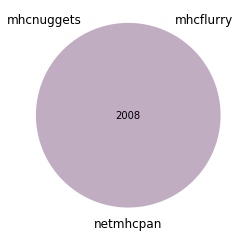

In [58]:
venn3([set(outputs['mhcnuggets']['peptide']), set(outputs['mhcflurry']['peptide']), set(outputs['netmhcpan']['peptide'])], 
      set_labels = ('mhcnuggets', 'mhcflurry', 'netmhcpan'))

In [72]:
outputs['mhcflurry']['allele'] = outputs['mhcflurry']['allele'].str.replace('*', '')

merged = pd.merge(outputs['mhcnuggets'][['peptide', 'allele', 'ic50']], 
               outputs['mhcflurry'][['peptide', 'allele', 'prediction']], 
               on=['peptide', 'allele'], 
               how='inner')

In [73]:
display(merged)

,peptide,allele,ic50,prediction
0,FSDGQGVPIAF,HLA-A01:01,2933.23,94.706374
1,MADEIANLVLA,HLA-A01:01,5287.00,2405.219226
2,YSWFSGITQFQ,HLA-A01:01,5404.65,30616.358585
3,YSWFSGITQFQ,HLA-A01:01,5404.65,30616.358585
4,YSWFSGITQFQ,HLA-A01:01,5404.65,30616.358585
...,...,...,...,...
53555,YKTFPPTEPKK,HLA-B08:01,38784.20,35474.160684
53556,GGPSDSTGSNQ,HLA-B08:01,38856.74,29911.901143
53557,EVTPSGTWLTY,HLA-B08:01,38907.21,31449.258179
53558,TNSSPDDQIGY,HLA-B08:01,38954.47,30998.482349


(array([9.9960e+03, 1.4743e+04, 4.9640e+03, 5.1990e+03, 8.6850e+03,
        8.0900e+03, 1.5350e+03, 2.8500e+02, 5.5000e+01, 8.0000e+00]),
 array([-37553.37971503, -29681.51592467, -21809.6521343 , -13937.78834394,
         -6065.92455357,   1805.93923679,   9677.80302716,  17549.66681753,
         25421.53060789,  33293.39439826,  41165.25818862]),
 <a list of 10 Patch objects>)

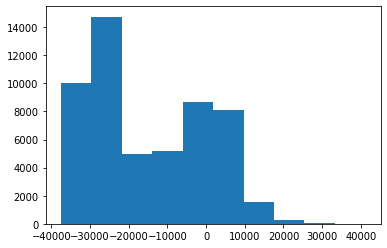

In [75]:
plt.hist(merged['ic50']-merged['prediction'])